# Homework 1

#### EE-556 Mathematics of Data - Fall 2024


In this homework, we consider a multiclass classification task modeled by multinomial (softmax) logistic regression. Your goal will be to analyze the estimator and its properties (convexity, existence/uniqueness), and to derive gradients/Hessians and smoothness bounds. The first part consists of theoretical questions only.


<div class="alert alert-info">
  ℹ️ <strong>Information on group based work:</strong>
</div>

- You are to deliver only 1 notebook per group.
- Asking assistance beyond your group is ok, but answers should be individual to the group.
- In the event that there was <span style="color: red;">disproportional work done</span> by different group members, let the TAs know.
- Only one member of the group is allowed to use AI. We will require sharing the conversation history with the AI in the form of a public link. If you use multiple conversations across the same or multiple tools please share all of them. Name the person in your group who is allowed to use AI. We encourage you to use the AI to help you understand the material, but we ask you to write the code and theory solutions by yourself.

<div style="border: 1px solid #f00; background-color: #fdd; padding: 10px; border-radius: 5px;">
  ⚠️ Do not forget: Write who are the people in your group as well as their respective SCIPER numbers
</div>


Person 1 **Name**: || Person 1 **SCIPER**:


Person 2 **Name**: || Person 2 **SCIPER**:


Person 3 **Name**: || Person 3 **SCIPER**:


<div style="border: 1px solid #0a0; background-color: #dfd; padding: 10px; border-radius: 5px;">
  📓 Feedback on AI use: Please use the following cell to provide feedback on the AI use in this notebook.
  
  For example, how useful were the tools to you? Which tools did you use? Did you feel like they helped you understand the material better?
</div

## 1. Multiclass Softmax Logistic Regression - 15 Points


We now model multiclass classification with classes $c \in \{1,\dots,C\}$. For each sample $(\mathbf{a}_i, b_i)$ with $\mathbf{a}_i \in \mathbb{R}^p$ and $b_i \in \{1,\dots,C\}$, let $\mathbf{X} = [\mathbf{x}_1,\dots,\mathbf{x}_C] \in \mathbb{R}^{p\times C}$ be the class weight matrix. The softmax model defines

$$
\mathbb{P}(b_i = c \mid \mathbf{a}_i) = \frac{\exp(\mathbf{a}_i^\top \mathbf{x}_c)}{\sum_{k=1}^C \exp(\mathbf{a}_i^\top \mathbf{x}_k)}.
$$

Assume i.i.d. samples $\{(\mathbf{a}_i,b_i)\}_{i=1}^n$. Our goal is to estimate $\mathbf{X}$ by maximum likelihood (and later with an $\ell_2$ regularizer).


__(a)__ (1 point) Show that the negative log-likelihood $f$ can be written as:

$$
\begin{aligned}
 f(\mathbf{X})
 &= - \log \mathbb{P}(b_1,\dots,b_n\mid \mathbf{a}_1,\dots,\mathbf{a}_n)\\
 &= \sum_{i=1}^n \left[ -\mathbf{a}_i^\top \mathbf{x}_{b_i} + \log \sum_{k=1}^C \exp(\mathbf{a}_i^\top \mathbf{x}_k) \right].
\end{aligned}
$$



Solution: <br>
$\mathbb{P}(b_1, \dots ,b_n \mid \mathbf{a}_1\dots,\mathbf{a_n}) = \prod_{i=1}^n \frac{\exp(\mathbf{a}_i^\top \mathbf{x}_{b_i})}{\sum_{k=1}^C \exp(\mathbf{a}_i^\top \mathbf{x}_k)}.$ <br>
$ -log\big(\mathbb{P}(b_1, \dots ,b_n \mid \mathbf{a}_1\dots,\mathbf{a_n})\big)= - \log \bigg(\prod_{i=1}^n \frac{\exp( \mathbf{a_i^\top x}_{b_i} )} {\sum_{k=1}^C \exp(\mathbf{a_i^\top x_k})} \bigg) $ <br>
$ = \sum_{i=1}^n - \log \bigg(\frac{\exp( \mathbf{a_i^\top x}_{b_i} )} {\sum_{k=1}^C \exp(\mathbf{a_i^\top x}_k)} \bigg) $ <br>
$ = \sum_{i=1}^n \bigg[ - \log \big( \exp(\mathbf{a_i^\top x}_{b_i} ) \big) - \bigg( -\log \sum_{k=1}^C \exp(\mathbf{a_i^\top x}_k) \bigg) \bigg] $ <br>
$ = \sum_{i=1}^n \bigg[ - \mathbf{a_i^\top x}_{b_i}  + \log \sum_{k=1}^C \exp(\mathbf{a_i^\top x}_k)  \bigg] $

__(b)__ (2 points) Show that $\mathbf{u} \mapsto \log\!\left(\sum_{k=1}^C e^{u_k}\right)$ is convex on $\mathbb{R}^C$. Then, show that $f(\mathbf{X})$ is convex.


Hint: use Jensen's inequality.

Solution: <br>
Jensen's inequality: $ \phi\big( \sum_{k=1}^C p_ku_k \big) \leq  \sum_{k=1}^C p_k\phi(u_k) \;$  if $\;\phi(\cdot)\;$ convex<br>
$ \log\bigg( \sum_{k=1}^Ce^{u_k} \bigg) $ <br>
$ = \log\bigg( \sum_{k=1}^Cp_k\frac{e^{u_k}}{p_k} \bigg) $ <br>
$ \ge \sum_{k=1}^Cp_k\log\bigg(\frac{e^{u_k}}{p_k}\bigg)$ <br>
$ = \sum_{k=1}^Cp_k\log(e^{u_k}) - \sum_{k=1}^Cp_k\log(p_k)$ <br>
$ = \sum_{k=1}^Cp_ku_k - \sum_{k=1}^Cp_k\log(p_k)$ <br>
$ = \langle \mathbf{p,u} \rangle - \sum_{k=1}^Cp_k\log(p_k)=f(\mathbf{u})\;$ (this is the affine mapping of $\mathbf{u}\;$ that we will call$\;f(\mathbf{u})$)<br>
$\implies\text{lse}(u)\ge f(\mathbf{u})$<br>
$\implies\text{lse}(u)\ge \sup f(\mathbf{u})$<br>
Since the supremum of convex functions is convex, $\text{lse}(u)$ is convex.

You have just established that the negative log-likelihood is a convex function. So in principle, any local minimum of the maximum likelihood estimator
$$
\mathbf{X}^\star_{ML} = \arg\min_{\mathbf{X} \in \mathbb{R}^{p\times C}} f(\mathbf{X})
$$

is a global minimum. But does the minimum always exist? We will ponder this question in the following three points.


__(c)__ (1 point) Explain the difference between infima and minima. Give an example of a convex function on $\mathbb{R}$ that does not attain its infimum.


Solution:<br>
A minima must strictly be part of the set, while the infima does not have this restriction. For example, a convex function on $\mathbb{R}$ that does not attain its infimum is $ f(x) = \frac{1}{x} $, whos infimum is $0$.

__(d)__ (1 point) Assume there exists $\mathbf{X}_0 \in \mathbb{R}^{p\times C}$ such that for all $i$,
$$
\mathbf{a}_i^\top \mathbf{x}_{0, b_i} - \max_{k \neq b_i} \mathbf{a}_i^\top \mathbf{x}_{0,k} > 0.
$$
This is called one-versus-all complete separation in multiclass settings. Give a geometric interpretation (e.g., for $p=2$) and explain why the name is appropriate.


Solution:<br>
$a_i$ multiplied by the weight of class $b_i$ yields a higher probability than that of any other class $b_k$. In the case of $p=2$, there are 2 features, hence we can imagine each division boundary of a class as a line. If $\mathbf{a}_i^\top \mathbf{x}_{0, b_i} - \max_{k \neq b_i} \mathbf{a}_i^\top \mathbf{x}_{0,k} > 0,\;a_i$ is in its correct class region. The name 'one-versus-all' is correct as we isolate one class $b_i$ and compare it to all other classes in taking the max score of $a_i$ with a class from $k\ne b_i$.

From this, you should see that it is likely that some datasets satisfy the complete separation assumption. Unfortunately, as you will show next, this can become an obstacle.


__(e)__ (1 point) In a one-versus-all complete separation setting (as in (d)), prove that $f$ does not attain its minimum. Hint: consider $f(\alpha \mathbf{X}_0)$ as $\alpha \to +\infty$ and compare it to $f(\mathbf{X}_0)$.


Solution:<br>
$f(\alpha \mathbf{X}_0)=\sum_{i=1}^n\bigg[\log\big( \sum_{k=1}^C e^{\alpha \mathbf{a}_i^\top\mathbf{x}_{0,k}}\big) - \alpha \mathbf{a}_i^\top\mathbf{x}_{0,b_i}\bigg]$ <br>
$=\sum_{i=1}^n\bigg[\log\big( e^{\alpha \mathbf{a}_i^\top\mathbf{x}_{0,b_i}} + \sum_{k\ne b_i} e^{\alpha \mathbf{a}_i^\top\mathbf{x}_{0,k}}\big) - \alpha \mathbf{a}_i^\top\mathbf{x}_{0,b_i}\bigg]$ <br>
$=\sum_{i=1}^n\bigg[\log\big( e^{\alpha \mathbf{a}_i^\top\mathbf{x}_{0,b_i}} \big(1+\sum_{k\ne b_i} e^{\alpha \mathbf{a}_i^\top\mathbf{x}_{0,k}-{\alpha \mathbf{a}_i^\top\mathbf{x}_{0,b_i}}}\big)\big) - \alpha \mathbf{a}_i^\top\mathbf{x}_{0,b_i}\bigg]$ <br>
$=\sum_{i=1}^n\bigg[\log\big( e^{\alpha \mathbf{a}_i^\top\mathbf{x}_{0,b_i}}\big)+\log\big(1+\sum_{k\ne b_i} e^{\alpha \mathbf{a}_i^\top\mathbf{x}_{0,k}-{\alpha \mathbf{a}_i^\top\mathbf{x}_{0,b_i}}}\big) - \alpha \mathbf{a}_i^\top\mathbf{x}_{0,b_i}\bigg]$ <br>
$=\sum_{i=1}^n\bigg[\alpha \mathbf{a}_i^\top\mathbf{x}_{0,b_i}+\log\big(1+\sum_{k\ne b_i} e^{\alpha \mathbf{a}_i^\top\mathbf{x}_{0,k}-{\alpha \mathbf{a}_i^\top\mathbf{x}_{0,b_i}}}\big) - \alpha \mathbf{a}_i^\top\mathbf{x}_{0,b_i}\bigg]$<br>
$=\sum_{i=1}^n\log\big(1+\sum_{k\ne b_i} e^{\alpha \mathbf{a}_i^\top\mathbf{x}_{0,k}-{\alpha \mathbf{a}_i^\top\mathbf{x}_{0,b_i}}}\big)$<br>
${\lim\atop{\alpha\rightarrow\infty}}f(\alpha \mathbf{X}_0)={\lim\atop{\alpha\rightarrow\infty}}\sum_{i=1}^n\log\big(1+\sum_{k\ne b_i} e^{\alpha \mathbf{a}_i^\top\mathbf{x}_{0,k}-{\alpha \mathbf{a}_i^\top\mathbf{x}_{0,b_i}}}\big)$<br>
=${\lim\atop{\alpha\rightarrow\infty}}\sum_{i=1}^n\log\big(1+\sum_{k\ne b_i} e^{\alpha( \mathbf{a}_i^\top\mathbf{x}_{0,k}-{ \mathbf{a}_i^\top\mathbf{x}_{0,b_i}})}\big)$<br>
$\mathbf{a}_i^\top\mathbf{x}_{0,k}-{ \mathbf{a}_i^\top\mathbf{x}_{0,b_i}}<0\;$ by part **(d)** 
$\implies{\lim\atop{\alpha\rightarrow\infty}}e^{\alpha(\mathbf{a}_i^\top\mathbf{x}_{0,k}-{ \mathbf{a}_i^\top\mathbf{x}_{0,b_i}})}=0$<br>
${\lim\atop{\alpha\rightarrow\infty}}f(\alpha \mathbf{X}_0)={\lim\atop{\alpha\rightarrow\infty}}\sum_{i=1}^n\log\big(1+0\big)=0$<br>
Hence, we can make $\alpha$ larger to be more confident in our model, but we will never have that this term $e^{\alpha(\mathbf{a}_i^\top\mathbf{x}_{0,k}-{ \mathbf{a}_i^\top\mathbf{x}_{0,b_i}})}$ is 0, hence $f(\alpha \mathbf{X}_0)$ does not attain its minimum.<br>
If we set $\alpha = 1$, then we have proved that $f(\mathbf{X}_0)$ does not attain its minimum.

We resolve this issue by adding a regularizer. Consider the regularized function

$$
 f_\mu(\mathbf{X}) = f(\mathbf{X}) + \frac{\mu}{2} \|\mathbf{X}\|_F^2, \quad \mu > 0.
$$

__(f)__ (1 point) Show that the gradient with respect to $\mathbf{X}$ of $f_\mu$ can be expressed as
$$
 \nabla_{\mathbf{X}} f_\mu(\mathbf{X}) = \sum_{i=1}^n \big( \mathbf{p}_i - \mathbf{e}_{b_i} \big) \mathbf{a}_i^\top + \mu \mathbf{X},\tag{1}
$$
where $\mathbf{e}_{b_i} \in \mathbb{R}^C$ is the [one-hot vector](https://en.wikipedia.org/wiki/One-hot) for class $b_i$, $\mathbf{p}_i \in \mathbb{R}^C$ has entries $p_{i,c} = \mathbb{P}(b_i=c\mid \mathbf{a}_i)$ under the softmax model, and $(\mathbf{p}_i - \mathbf{e}_{b_i})\mathbf{a}_i^\top$ denotes the outer product.



Solution:<br>
$\nabla_\mathbf{X}f_\mu(\mathbf{X}) = \nabla_\mathbf{X}f(\mathbf{X})+\nabla_{\mathbf{X}}\big( \frac{\mu}{2} \|\mathbf{X}\|_F^2\big)$<br>
$= \nabla_\mathbf{X}\bigg[ \sum_{i=1}^n \bigg(  \log \sum_{k=1}^C \exp(\mathbf{a_i^\top x}_k)- \mathbf{a_i^\top x}_{b_i}   \bigg)\bigg]+\nabla_{\mathbf{X}}\big( \frac{\mu}{2} \|\mathbf{X}\|_F^2\big)$ <br>
Assign score $s_{i,k}\coloneqq\mathbf{a_i^\top x}_k$<br>
$= \nabla_\mathbf{X}\bigg[ \sum_{i=1}^n \bigg( \text{lse}(s_i)  - s_{i,b_i} \bigg)\bigg]+\nabla_{\mathbf{X}}\big( \frac{\mu}{2} \|\mathbf{X}\|_F^2\big)$ <br>
IDK

__(g)__ (1 point) Show that the Hessian of $f_\mu$ can be written as
$$
 \nabla^2 f_\mu(\mathbf{X}) = \sum_{i=1}^n (\mathbf{a}_i\mathbf{a}_i^\top) \otimes \big( \operatorname{Diag}(\mathbf{p}_i) - \mathbf{p}_i\mathbf{p}_i^\top \big) + \mu \mathbf{I},\tag{2}
$$
where $\otimes$ is the Kronecker product, and $\operatorname{Diag}(\mathbf{p}_i) - \mathbf{p}_i\mathbf{p}_i^\top$ is the softmax Jacobian, which is positive semidefinite.


Solution: <br>
$$\nabla f_\mu(\mathbf{X}) = \sum_{i=1}^n \big( \mathbf{p}_i - \mathbf{e}_{b_i} \big) \mathbf{a}_i^\top + \mu \mathbf{X},\tag{1}$$
$\frac{\partial}{\partial X}(\nabla f_\mu(\mathbf{X})) = \frac{\partial}{\partial X}\big(\sum_{i=1}^n \big( \mathbf{p}_i - \mathbf{e}_{b_i} \big) \mathbf{a}_i^\top + \mu \mathbf{X}\big)$ <br>
$\nabla^2 f_\mu(\mathbf{X}) = \frac{\partial}{\partial X}\big(\sum_{i=1}^n \big( \mathbf{p}_i\mathbf{a}_i^\top - \mathbf{e}_{b_i}\mathbf{a}_i^\top \big) + \mu \mathbf{X}\big)$ <br>
$ =\frac{\partial}{\partial X}\big(\sum_{i=1}^n \mathbf{p}_i\mathbf{a}_i^\top\big) - \frac{\partial}{\partial X}(\sum_{i=1}^n\mathbf{e}_{b_i}\mathbf{a}_i^\top )+ \frac{\partial}{\partial X}(\mu \mathbf{X})$<br>
$=\frac{\partial}{\partial X}\big(\sum_{i=1}^n \mathbf{p}_i\mathbf{a}_i^\top\big) - 0 + \mu \mathbf{I}$<br><br>
$\frac{\partial}{\partial X}\big(\sum_{i=1}^n \mathbf{p}_i\mathbf{a}_i^\top\big)$ where $p_k = \text{softmax}(z_k)=\frac{e^{z_k}}{\sum_{j=1}^m e^{z_j}}$ and $z_k = Xa_k$<br>
$\implies \frac{\partial }{\partial z_t}(p_s)=\frac{\frac{\partial}{\partial z_t}(e^{z_s})
\sum_{j=1}^me^{z_j}-e^{z_s}e^{z_t}}{(\sum_{j=1}^m e^{z_j})^2} 
=\frac{\frac{\partial}{\partial z_t}(e^{z_s})}{\sum_{j=1}^m e^{z_j}} - \frac{e^{z_s}}{(\sum_{j=1}^m e^{z_j})}\cdot\frac{e^{z_t}}{(\sum_{j=1}^m e^{z_j})}$<br>
so $\,\frac{\partial p_s}{\partial z_t}= p_s(1 - p_s)\;$ if $s=t$<br>
$\;\quad\frac{\partial p_s}{\partial z_t}=-p_sp_t\quad\quad$ if $s\ne t$<br>
$\implies J_i = \text{Diag}(p_i) - p_ip_i^\top$<br><br>
$\text{vec}(d\mathbf{p}_i\mathbf{a}_i^\top)$<br>
apply $\text{vec}(AB)=(B^\top\otimes I)\text{vec}(A)$<br>
$=(\mathbf{a}_i \otimes I)\text{vec}(d\mathbf{p}_i)$<br>
$=(\mathbf{a}_i \otimes I)\text{vec}(J_i d\mathbf{z}_i)$<br>
$=(\mathbf{a}_i \otimes I)\text{vec}(J_i d\mathbf{X}\mathbf{a_i})$<br>
apply $\text{vec}(\mathbf{AXB})=(\mathbf{B}^\top\otimes\mathbf{A})\text{vec}(\mathbf{X})$ <br>
$=(\mathbf{a}_i \otimes I)(\mathbf{a}_i^\top \otimes J_i)\text{vec}(d\mathbf{X})$<br>
apply $(\mathbf{A}\otimes\mathbf{B})(\mathbf{C}\otimes\mathbf{D})=(\mathbf{AC}\otimes\mathbf{BD})$<br>
$=(\mathbf{a}_i\mathbf{a}_i^\top \otimes J_i)\text{vec}(d\mathbf{X})$<br>
IDK

__(h)__ (1 point) Show that $f_\mu$ is $\mu$-strongly convex.


Solution:<br>
Apply lemma $f$ is $\mu$-strongly convex iff  $\nabla^2f(x)\succeq\mu\mathbf{I},\; \forall x\in \mathbb{R}^p$<br><br>
$\nabla^2 f_\mu(\mathbf{X}) = \sum_{i=1}^n (\mathbf{a}_i\mathbf{a}_i^\top) \otimes \big( \operatorname{Diag}(\mathbf{p}_i) - \mathbf{p}_i\mathbf{p}_i^\top \big) + \mu \mathbf{I}$<br>
i.e. prove $\nabla^2 f_\mu(\mathbf{X}) = \sum_{i=1}^n (\mathbf{a}_i\mathbf{a}_i^\top) \otimes \big( \operatorname{Diag}(\mathbf{p}_i) - \mathbf{p}_i\mathbf{p}_i^\top \big) + \mu \mathbf{I}\succeq\mu\mathbf{I}$<br>
$\Longleftrightarrow \sum_{i=1}^n (\mathbf{a}_i\mathbf{a}_i^\top) \otimes \big( \operatorname{Diag}(\mathbf{p}_i) - \mathbf{p}_i\mathbf{p}_i^\top \big) \succeq \mathbf{0}$<br>
- each $\mathbf{a}_i\mathbf{a}_i^T\succeq \mathbf{0}$
- $\text{Diag}(\mathbf{p}_i)-\mathbf{p}_i\mathbf{p}_i^\top \succeq\mathbf{0}$
    - For any $v\in\mathbb{R}^m,\; v^\top(\text{Diag}(\mathbf{p}_i)-\mathbf{p}_i\mathbf{p}_i^\top)v=\sum_{k=1}^mp_k{v_k}^2-\sum_{k=1}^m(p_kv_k)^2$<br>$=\mathbb{E}[v^2]-(\mathbb{E}[v])^2=\text{Var}(v)\ge0$
- $A \otimes B \succeq \mathbf{0}$ if $A \succeq \mathbf{0}$ and $B \succeq \mathbf{0}$
- Therefore $\sum_{i=1}^n (\mathbf{a}_i\mathbf{a}_i^\top) \otimes \big( \operatorname{Diag}(\mathbf{p}_i) - \mathbf{p}_i\mathbf{p}_i^\top \big) \succeq \mathbf{0}\implies f_\mu$ is strongly convex

__(i)__ (1 point) Is it possible for a strongly convex function to not attain its minimum? Justify your reasoning (you may assume the domain is $\mathbb{R}^{p\times C}$).


Solution:<br>
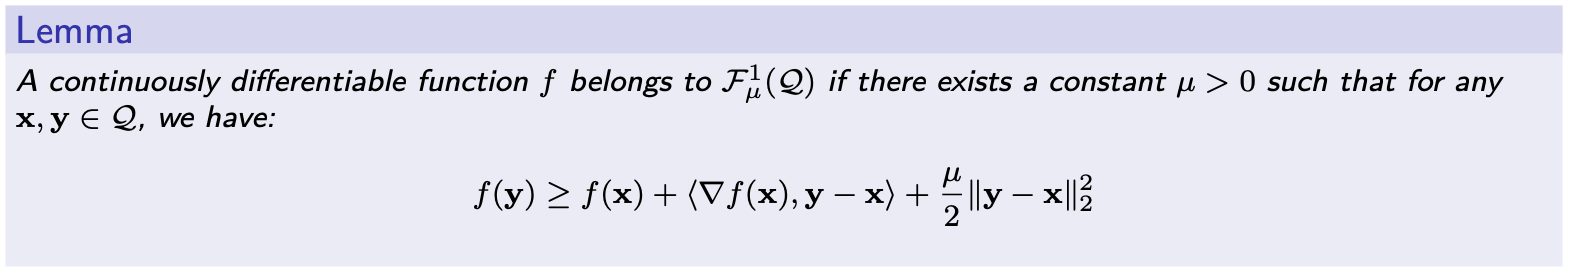
where $\mathcal{F}^1_\mu(\mathcal{Q})\implies f$ is differentiable and $\mu$-strong convex. <br>
As $y \rightarrow\infty, f(y)\rightarrow\infty$ as the quadratic term dominates (quadratic lower bound) $\implies$ minimizers cannot escape boundary at extremities. <br><br>
Using definition of strong convexity $f(\theta x + (1-\theta)y)\leq\theta f(x)+(1-\theta)f(y)-\frac{\mu}{2}\theta(1-\theta)\|x-y\|^2$ with midpoint $\frac{x+y}{2}$, i.e. $\theta = \frac{1}{2}$ and $x\ne y$<br>
$f(\frac{x+y}{2})\leq \frac{f(x)+f(y)}{2}-\frac{\mu}{2}\|\frac{x-y}{2}\|^2\implies f(\frac{x+y}{2})< \frac{f(x)+f(y)}{2}\implies$ strict convexity$\implies$ unique minimimum.<br>
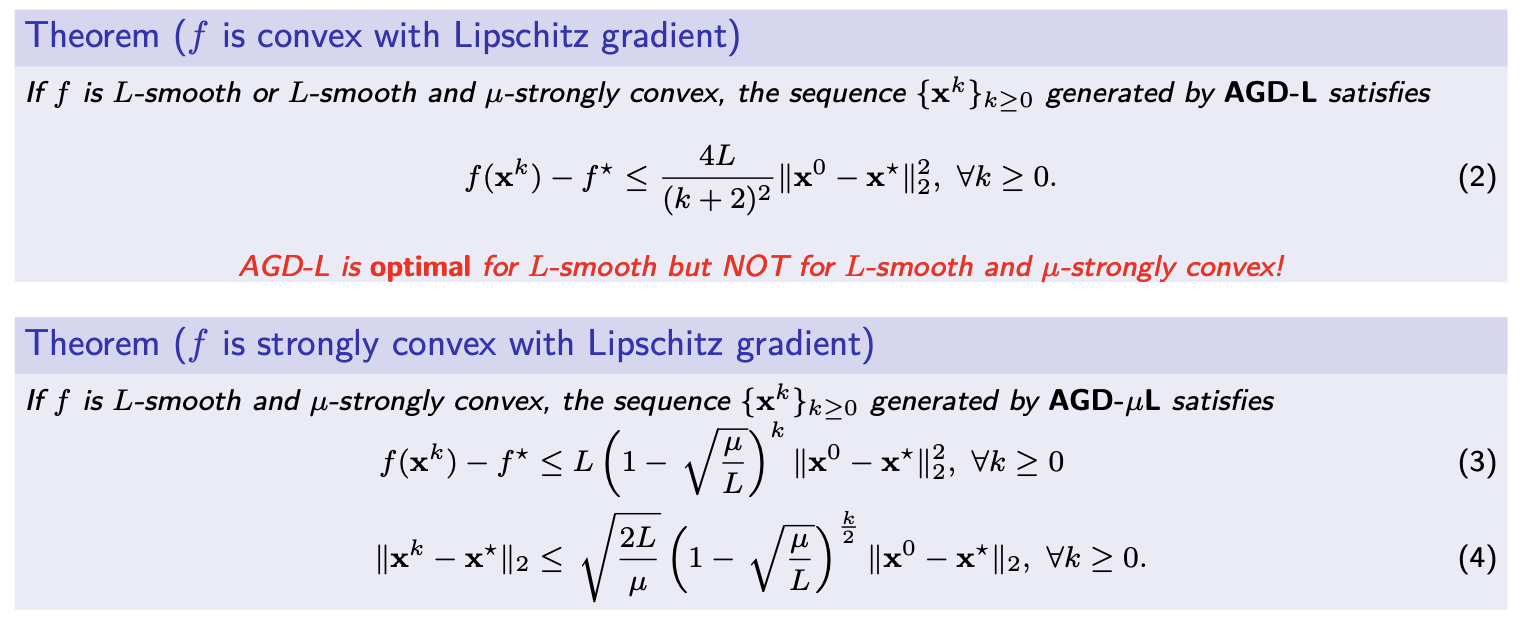<br>
Thus, given a unique minimum exists, accelerated gradient descent will converge. <br>
Therefore, it is not possible for a strongly convex function to not attain its minimum.

We will now show that $f_\mu$ is smooth, i.e., $\nabla f_\mu$ is L-Lipschitz with respect to the Frobenius norm, with a simple conservative bound
$$
 L = \|\mathbf{A}\|_F^2 + \mu.
$$
where
$$
 \mathbf{A} = \begin{bmatrix}
  \leftarrow &  \mathbf{a}_1^\top & \rightarrow \\
  \leftarrow &  \mathbf{a}_2^\top & \rightarrow \\
   &  \ldots &  \\
  \leftarrow &  \mathbf{a}_n^\top & \rightarrow \\
 \end{bmatrix}.
$$
(You may use that the operator norm of the softmax Jacobian is bounded by 1/4, and a looser bound $\le 1$ is acceptable for grading.)

Hint: check the properties of the spectral norm with respect to dot product, Kronecker product, and outer product.

(1 point for all three questions)


__(j-1)__ Show that $\lambda_{\max}(\mathbf{a}_i\mathbf{a}_i^T) = \left\| \mathbf{a}_i\right\|_2^2$, where $\lambda_{\max}(\cdot)$ denotes the largest eigenvalue.


Solution:<br>
$\mathbf{a}_i\in\mathbb{R}^p$<br>
From Matrix Cookbook:
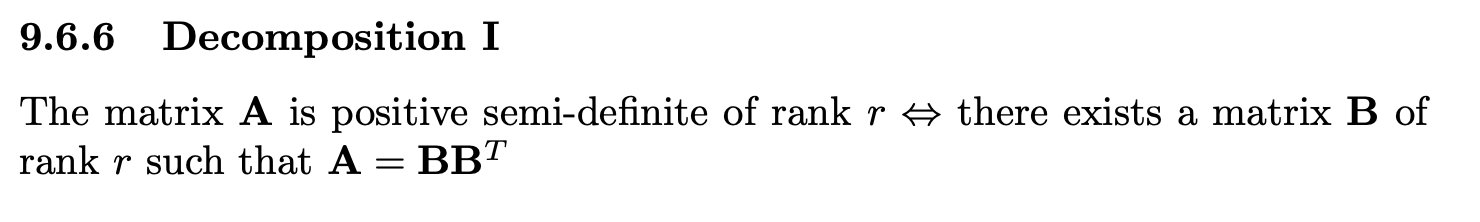
$\implies\mathbf{a}_i\mathbf{a}_i^\top$ is positive semidefinite of rank 1.<br>
Apply Rayleigh's quotient $\lambda_{\text{max}}(a_ia_i^\top)=\max_{\|v\|_2=1}x^\top(a_ia_i^\top)v=max_{\|v\|_2=1}(a_i^\top v)^2$<br>
Apply Cauchy-Schwartz inequality $|a_i^\top v |\leq \|a_i\|_2\|v\|_2=\|a_i\|_2$<br>$v^\top(a_ia_i^\top)v=(a_i^\top v)^2\leq\|a_i\|_2^2$.<br>
Equality condition attained at $v=\frac{a_i}{\|a_i\|_2}, a_i\ne0$.<br>
Thus $\frac{a_i}{\|a_i\|_2}$ is the largest eigenvector with corresponding eigenvalue $\|a_i\|^2_2$. As $a_ia_i^\top$ is rank-1, all other eigenvalues are 0.<br>
Therefore $\lambda_\text{max}(a_ia_i^\top)=\|a_i\|^2_2$.

__(j-2)__ Using (2), show that $\lambda_{\max}(\nabla^2 f_\mu(\mathbf{X})) \leq \sum_{i=1}^{n} \|\mathbf{a}_i\|_2^2 + \mu$.

Solution:<br>
$$
 \nabla^2 f_\mu(\mathbf{X}) = \sum_{i=1}^n (\mathbf{a}_i\mathbf{a}_i^\top) \otimes \big( \operatorname{Diag}(\mathbf{p}_i) - \mathbf{p}_i\mathbf{p}_i^\top \big) + \mu \mathbf{I},\tag{2}
$$
$\implies\lambda_\text{max}(\nabla^2 f_\mu(\mathbf{X}))\le\sum_{i=1}^{n} \|\mathbf{a}_i\|_2^2 + \mu$<br>
<br><br>
Let $H \coloneqq \sum_{i=1}^n (\mathbf{a}_i\mathbf{a}_i^\top) \otimes \big( \operatorname{Diag}(\mathbf{p}_i) - \mathbf{p}_i\mathbf{p}_i^\top \big)$<br>
$\nabla^2 f_\mu(\mathbf{X}) = H + \mu \mathbf{I}$<br>
$\lambda_\text{max}(\nabla^2 f_\mu(\mathbf{X}))=\lambda_\max(H+\mu\mathbf{I})=\lambda_\max(H)+\mu$<br>
By (h) we know that $H$ is symmetric so apply spectral/operator norm for symmetric matrices $\lambda_\max(S)=\|S\|_2$<br>
$=\|H\|_2+\mu=\sum_{i=1}^n\|\mathbf{a}_i\mathbf{a}_i^\top \otimes J_i\|_2+\mu$<br>
Apply Kronecker identity $\|A\otimes B\|_2=\|A\|_2\|B\|_2$<br>
$=\sum_{i=1}^n\|\mathbf{a}_i\mathbf{a}_i^\top\|_2 \| J_i\|_2+\mu$<br>
Apply softmax Jacobian bound $\|J_i\|_2\le1$<br>
$\leq\sum_{i=1}^n\|\mathbf{a}_i\mathbf{a}_i^\top\|_2 +\mu=\sum_{i=1}^n\|a_i\|^2_2+\mu$<br>

__(j-3)__ Conclude that $f_\mu$ is $L$-smooth for $L = \|\mathbf{A}\|_F^2 + \mu$.


Solution:<br>
In (j-3) we proved that $\lambda_\max(\nabla^2f_\mu(X))\le\|A\|^2_F+\mu=L$<br>
We know a function is Lipschitz-continuous if $\|\nabla_\mu f(Y)-\nabla_\mu f(X)\|_F\leq L\|Y-X\|_F$<br>
With arbitrary $X, Y$ let $\Delta=Y-X$<br>
$\implies \nabla f_\mu(Y)-\nabla f_\mu(X)=\int_0^1\nabla^2f_\mu(X+t\Delta)\Delta dt$<br>
IDK

__(l)__ (1 point) KL divergence and NLL. Let $q(b_i\mid\mathbf{a}_i)$ be the true label distribution and $p(b_i\mid\mathbf{a}_i)$ the model softmax. Write the KL divergence $\mathrm{KL}(q\,\|\,p)$ and show that minimizing the KL divergence between $q$ and $p$ is equivalent to minimizing the negative log-likelihood derived in (a).


From your work in this section, you have shown that the maximum likelihood estimator for multiclass softmax logistic regression might not exist, but it can be guaranteed to exist by adding a $\|\cdot\|_F^2$ regularizer. Consequently, the estimator for $\mathbf{X}$ we will use will be the solution of the smooth strongly convex problem,
$$
 \mathbf{X}^\star = \arg\min_{\mathbf{X} \in \mathbb{R}^{p\times C}} f(\mathbf{X}) + \frac{\mu}{2}\|\mathbf{X}\|_F^2.\tag{3}
$$


## Binary logistic regression (specialization for Part 2)

While this part analyzed the multiclass (softmax) setting, in the next exercise we will continue under the simplified two-class case.

Let labels be $b_i \in \{-1, +1\}$, features $\mathbf{a}_i \in \mathbb{R}^p$, and weight vector $\mathbf{x} \in \mathbb{R}^p$. Define the sigmoid
$$
\sigma(t) = \frac{1}{1+e^{-t}}.
$$
Model the conditional distribution as
$$
\mathbb{P}(b_i = j \mid \mathbf{a}_i) = \sigma\big(j\, \mathbf{a}_i^\top \mathbf{x}\big), \quad j \in \{-1,+1\}.
$$
The likelihood over i.i.d. samples $\{(\mathbf{a}_i, b_i)\}_{i=1}^n$ is
$$
\mathcal{L}(\mathbf{x}) = \prod_{i=1}^n \sigma\big(b_i\, \mathbf{a}_i^\top \mathbf{x}\big),
$$
so the negative log-likelihood is
$$
 f(\mathbf{x}) = -\log \mathcal{L}(\mathbf{x}) = \sum_{i=1}^n \log\big(1 + e^{-b_i\, \mathbf{a}_i^\top \mathbf{x}}\big).
$$

__(m)__ (1 point) Show that the gradient of the negative log-likelihood is the standard binary logistic regression gradient:
$$
\nabla f(\mathbf{x}) = \sum_{i=1}^n \big(-b_i\, \sigma(-b_i\, \mathbf{a}_i^\top \mathbf{x})\big)\, \mathbf{a}_i.
$$
(Hint: use the chain rule and $\sigma'(t) = \sigma(t)\big(1-\sigma(t)\big)$.)

We will use this binary formulation in Part 2 - First order methods.


Solution:<br>
$f(\mathbf{x}) = \sum_{i=1}^n \log\big(1 + \exp(-b_i\, \mathbf{a}_i^\top \mathbf{x})\big)$<br>
$\nabla f(\mathbf{x}) = \frac{d}{dx}\bigg(\sum_{i=1}^n \log\big(1 + \exp({-b_i\, \mathbf{a}_i^\top \mathbf{x}}\big)\bigg)$<br>
$= \sum_{i=1}^n (-b_i\, \mathbf{a}_i^\top) \cdot\frac{\exp(-b_i\, \mathbf{a}_i^\top \mathbf{x})}{1 + \exp(-b_i\, \mathbf{a}_i^\top \mathbf{x})}$<br>
Let $\sigma(\cdot)\coloneqq\frac{\exp(-b_i\, \mathbf{a}_i^\top \mathbf{x})}{1+\exp(-b_i\, \mathbf{a}_i^\top \mathbf{x})}$<br>
$= \sum_{i=1}^n -b_i\, \mathbf{a}_i^\top \sigma(-b_i\mathbf{a}_i^\top \mathbf{x})$<br>
$= \sum_{i=1}^n -b_i\, \sigma(-b_i\mathbf{a}_i^\top \mathbf{x})\mathbf{a}_i$<br>